In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics.pairwise import laplacian_kernel

In [15]:
X =[[0,1],[0,-1],[1,0],[1,2],[1,-2],[-1,1],[-1,-1],[-0.5,0],[0,2],[0.2,-1.8]]
X=np.array(X)

y=[1,1,1,1,1,0,0,0,0,0]
y=np.array(y)

In [16]:
# https://scikit-learn.org/stable/modules/svm.html#kernel-functions
configs = [
    # 多项式核
    dict(kernel='poly', degree=3, coef0=1, gamma=1),
    dict(kernel='poly', degree=10, coef0=1, gamma=3),
    dict(kernel='poly', degree=10, coef0=1, gamma=1),
    dict(kernel='poly', degree=10, coef0=1, gamma=0.1),
    # 高斯核
    dict(kernel='rbf', gamma=1e4 / 2),
    dict(kernel='rbf', gamma=1e2 / 2),
    dict(kernel='rbf', gamma=1 / 2),
    dict(kernel='rbf', gamma=1 / 2 / 1e2),
    # 拉普拉斯核
    dict(kernel='laplacian', gamma=1e2),
    dict(kernel='laplacian', gamma=1e1),
    dict(kernel='laplacian', gamma=1 / 1),
    dict(kernel='laplacian', gamma=1e-1),
    # Sigmoid核
    dict(kernel='sigmoid', coef0=1, gamma=10),
    dict(kernel='sigmoid', coef0=1, gamma=1),
    dict(kernel='sigmoid', coef0=1, gamma=0.1),
    dict(kernel='sigmoid', coef0=0, gamma=1),
]

In [17]:
def laplacian_kernel_wrapper(gamma=1):
    def _kernel(X, Y):
        return laplacian_kernel(X, Y, gamma)
    return _kernel

In [22]:
def build_svc(config):
    if config['kernel'] == 'laplacian':
        kernel_fn = laplacian_kernel_wrapper(config['gamma'])
        clf = svm.SVC(kernel=kernel_fn)
    else:
        clf = svm.SVC(**config)
    return clf

In [26]:
def build_svr(config):
    if config['kernel'] == 'laplacian':
        kernel_fn = laplacian_kernel_wrapper(config['gamma'])
        reg = svm.SVR(kernel=kernel_fn)
    else:
        reg = svm.SVR(**config)
    return reg

In [27]:
def config2str(config):
    s = ''
    for i, (k, v) in enumerate(config.items()):
        s += k + ':' + str(v)
        if i < len(config) - 1:
            s += ', '
    return s

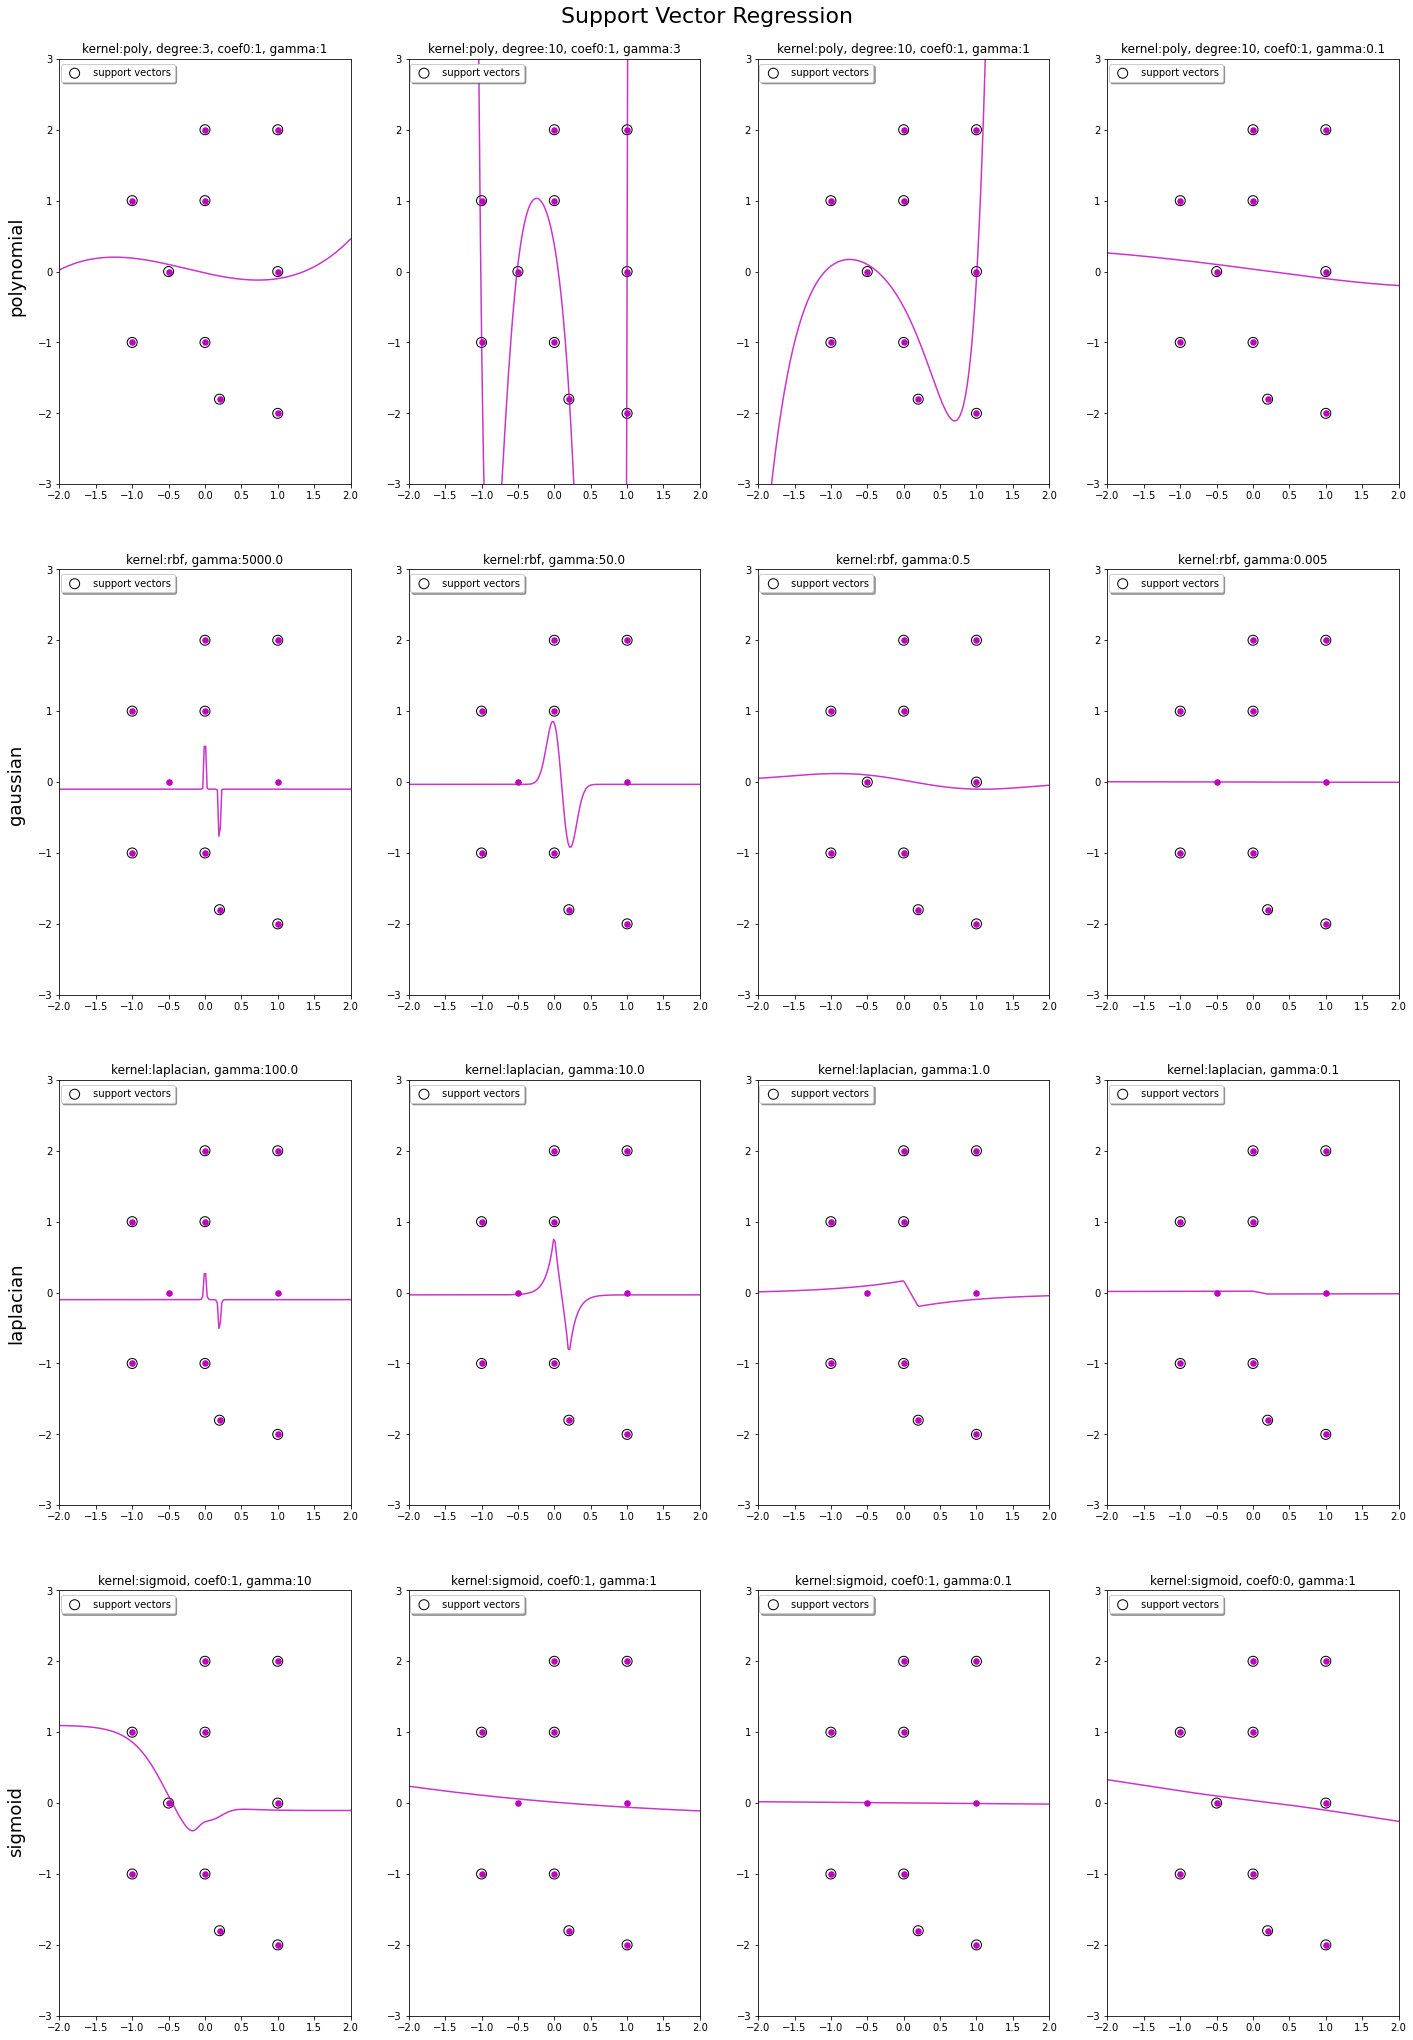

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=((6*4, 9*4)))

for i in range(16):
    ax = axs[i//4][i%4]
    config = configs[i]
    reg = build_svr(config)
    reg.fit(X[:, 0].reshape(-1, 1), X[:, 1].ravel())

    # 绘制数据点
    ax.scatter(X[:, 0], X[:, 1], s=30, c='m')

    # 绘制边界
    xx = np.linspace(-2, 2, 200)
    yy = reg.predict(xx.reshape(-1, 1))
    ax.plot(xx, yy, c='m', alpha=0.8)

    # 绘制支持向量
    ax.scatter(X[:, 0][reg.support_], X[:, 1][reg.support_], s=100,
               linewidth=1, facecolors='none', edgecolors='k',
               label='support vectors')

    ax.set_xlim(-2, 2)
    ax.set_ylim(-3, 3)
    ax.legend(loc='upper center', bbox_to_anchor=(0.2, 1.),
                        ncol=1, fancybox=True, shadow=True)
    ax.set_title(config2str(config))
    
fig.text(0.1, 0.8, 'polynomial', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.6, 'gaussian', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.4, 'laplacian', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.2, 'sigmoid', ha='center', va='center', rotation='vertical', fontsize=18)
fig.suptitle("Support Vector Regression", y=0.9, fontsize=22)

plt.savefig('svr.pdf')
plt.show()

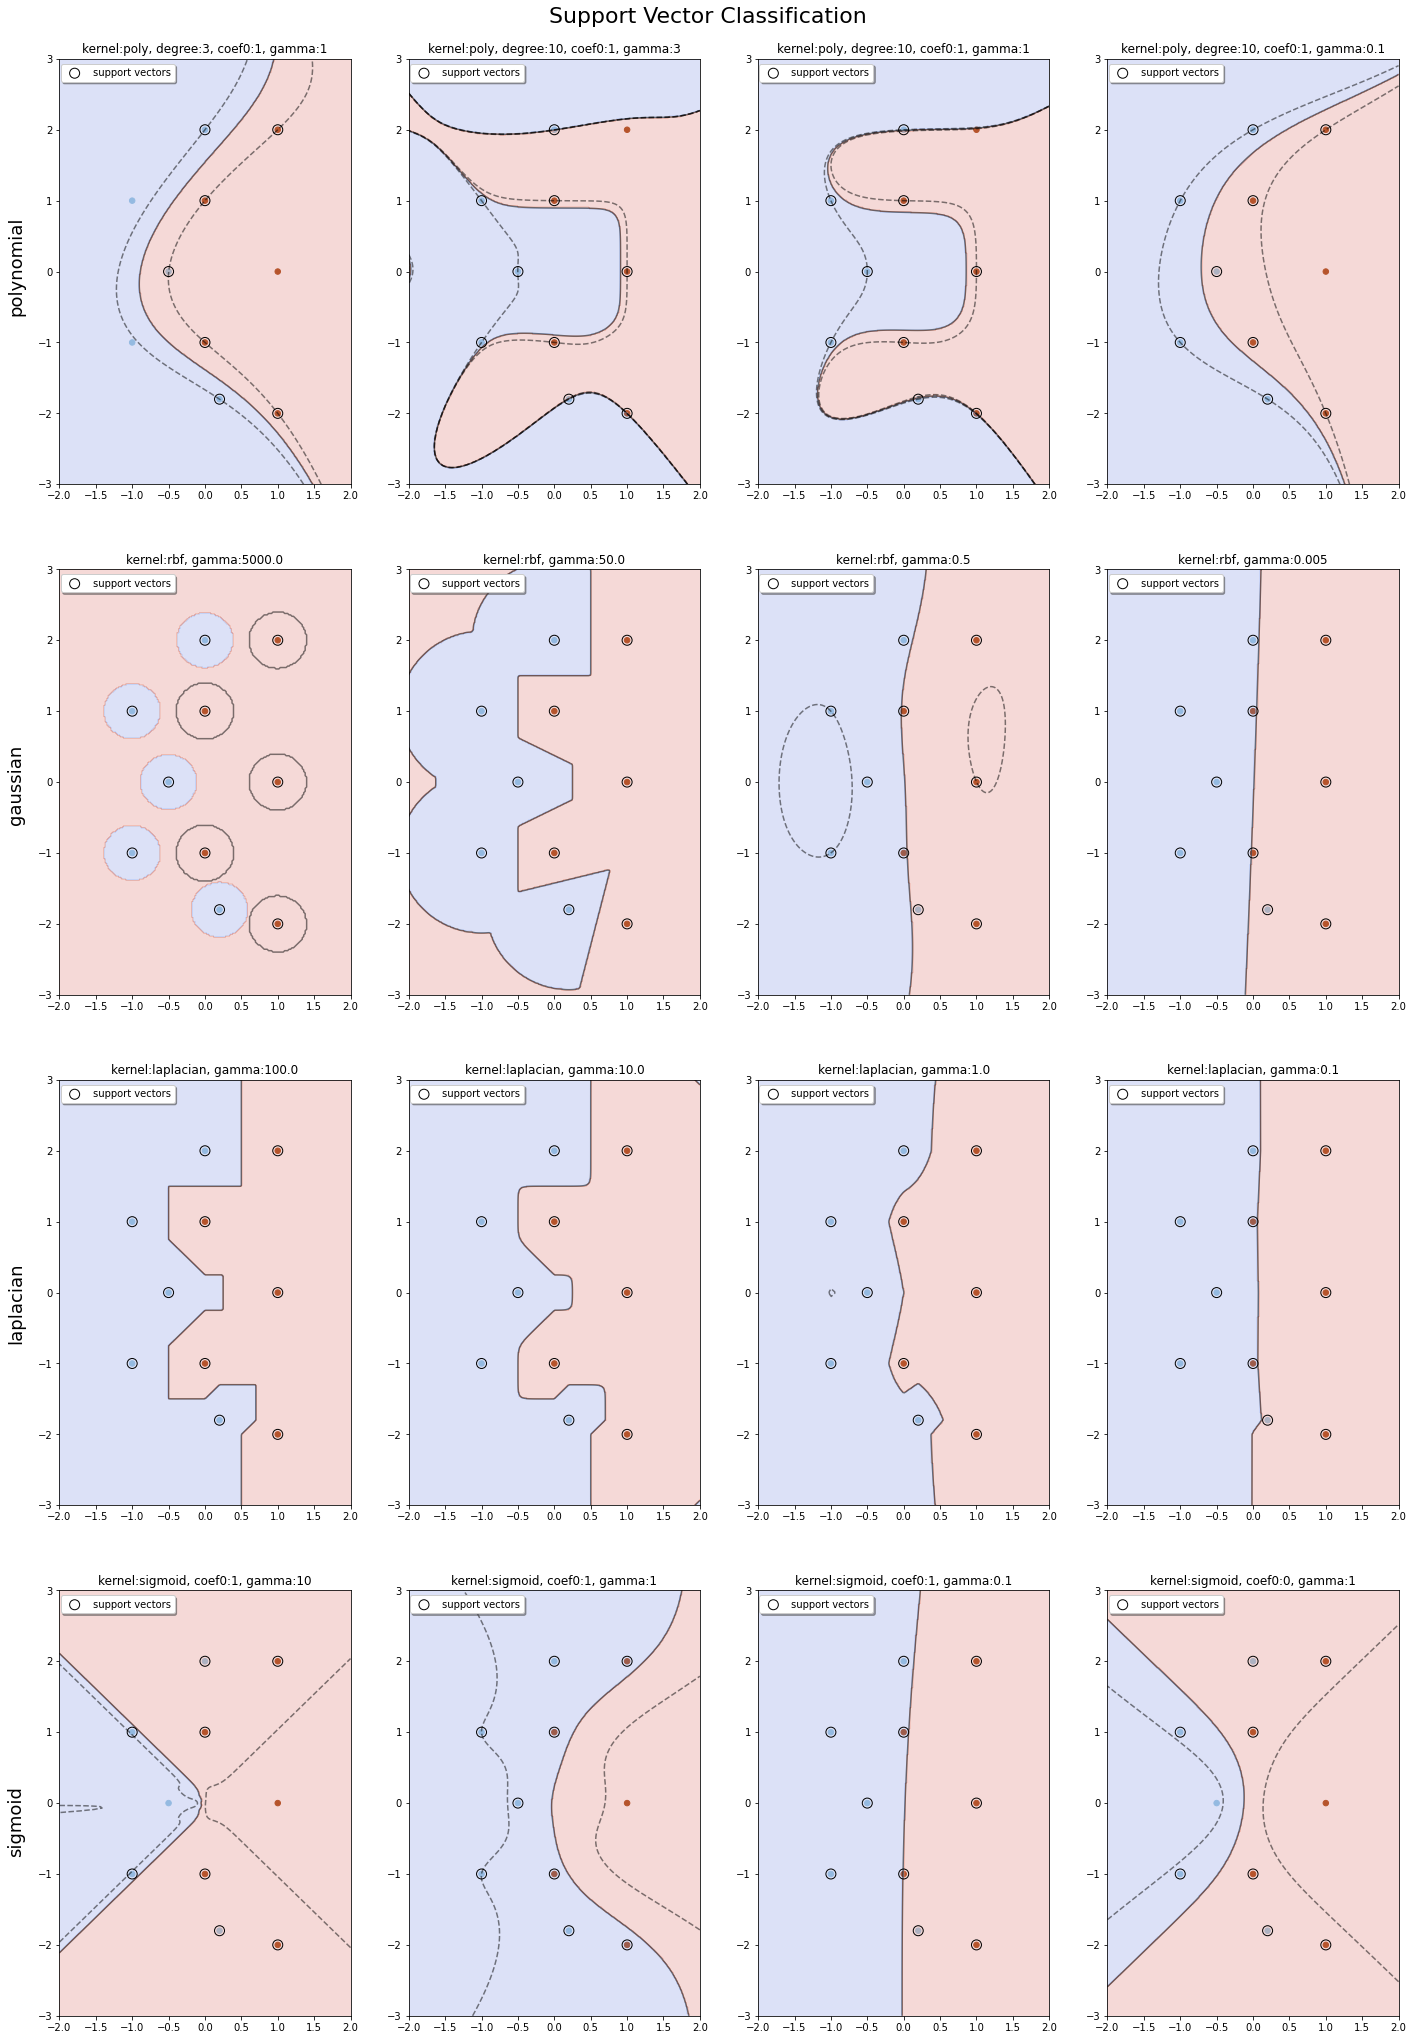

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=((6*4, 9*4)))

for i in range(16):
    ax = axs[i//4][i%4]
    config = configs[i]
    clf = build_svc(config)
    clf.fit(X, y)

    # 绘制数据点
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # 创建网格
    xx = np.linspace(-2, 2, 200)
    yy = np.linspace(-3, 3, 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z1 = clf.decision_function(xy).reshape(XX.shape)
    Z2 = clf.predict(xy).reshape(XX.shape)

    # 绘制边界
    ax.contour(XX, YY, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # 绘制热力图
    ax.contourf(XX, YY, Z2, cmap=plt.cm.coolwarm, alpha=0.2)

    # 绘制支持向量
    ax.scatter(X[clf.support_][:, 0], X[clf.support_][:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k',
               label='support vectors')

    ax.legend(loc='upper center', bbox_to_anchor=(0.2, 1.),
                        ncol=1, fancybox=True, shadow=True)
    ax.set_title(config2str(config))
             
fig.text(0.1, 0.8, 'polynomial', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.6, 'gaussian', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.4, 'laplacian', ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.1, 0.2, 'sigmoid', ha='center', va='center', rotation='vertical', fontsize=18)
fig.suptitle("Support Vector Classification", y=0.9, fontsize=22)

plt.savefig('svc.pdf')
plt.show()